# PREPROCESSING AND VISUALIZATION OF TITANIC DATASET

# Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:/Users/hi/Desktop/sb/in class/titanic.csv',sep="\t")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [5]:
#COLUMNS
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 'Survived' is the target variable.

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Droping unnecessary columns

In [7]:
#'PassengerId', 'Name' and 'Ticket' doesn't contribute 
#There are a lot of missing values in the column 'Cabin', we can remove it from the data. 
data = data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

# Filling Missing Values

In [8]:
data.isnull().any

<bound method DataFrame.any of      Survived  Pclass   Name    Sex    Age  SibSp  Parch   Fare  Embarked
0       False   False  False  False  False  False  False  False     False
1       False   False  False  False  False  False  False  False     False
2       False   False  False  False  False  False  False  False     False
3       False   False  False  False  False  False  False  False     False
4       False   False  False  False  False  False  False  False     False
5       False   False  False  False   True  False  False  False     False
6       False   False  False  False  False  False  False  False     False
7       False   False  False  False  False  False  False  False     False
8       False   False  False  False  False  False  False  False     False
9       False   False  False  False  False  False  False  False     False
10      False   False  False  False  False  False  False  False     False
11      False   False  False  False  False  False  False  False     False
12     

### (Here the 'Age','Embarked ' have the missing values)

### Age is of numerical type data and Embarked is catagorical type data

In [9]:
print(data.isna().sum())

Survived     0
Pclass       0
Name         0
Sex          0
Age         30
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64


In [10]:
data['Age'].fillna(data['Age'].mean(), inplace=True)


In [11]:
print(data.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
dtype: int64


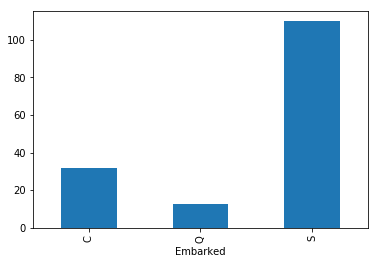

In [12]:
data.groupby('Embarked').size().plot(kind='bar')

#### The letter S is most repeated,so we replace the missing value with S

In [13]:

data['Embarked'].fillna('S', inplace=True)
print(data.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# Correlation

In [14]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.116340,-0.106578,-0.066943,0.039435,0.029343
Pclass,-0.116340,1.000000,-0.332233,0.087420,0.016491,-0.607256
Age,-0.106578,-0.332233,1.000000,-0.378670,-0.207651,0.023235
SibSp,-0.066943,0.087420,-0.378670,1.000000,0.399040,0.271997
Parch,0.039435,0.016491,-0.207651,0.399040,1.000000,0.254822
Fare,0.029343,-0.607256,0.023235,0.271997,0.254822,1.000000


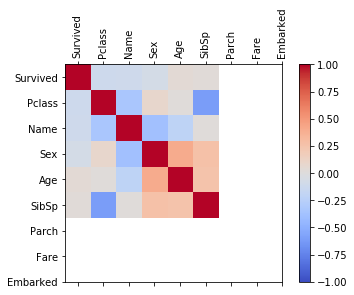

In [15]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Visualization

### Passengers Count vs Survived or not count

Text(0, 0.5, 'Passenger Count')

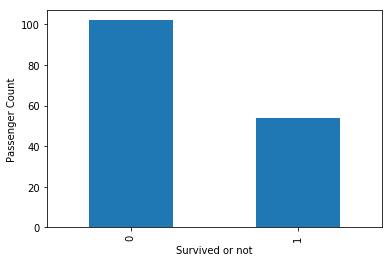

In [16]:
plt = data.Survived.value_counts().plot('bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

### Majority of passengers are 'Male'

Text(0, 0.5, 'Passenger count')

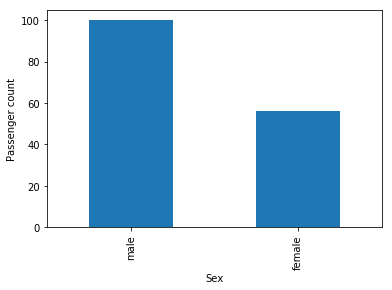

In [17]:
plt = data.Sex.value_counts().plot('bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### The survival probality is more for females

Text(0, 0.5, 'Survial Probability')

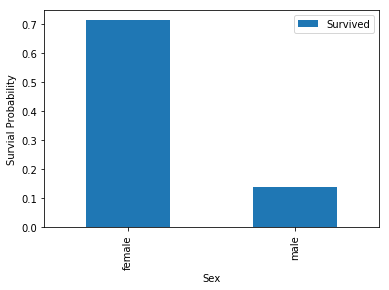

In [18]:
plt=data[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survial Probability')

### Embarked ( the passenger count is more from 'S' )

Text(0, 0.5, 'Passenger count')

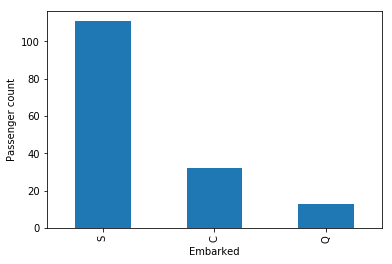

In [19]:
plt = data.Embarked.value_counts().plot('bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

### The Survival probability is more for passengers from 'Q'

Text(0, 0.5, 'Survival Probability')

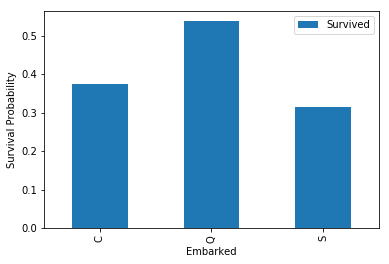

In [20]:
plt=data[['Embarked','Survived']].groupby('Embarked').mean().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

### The passenger count is more from 3rd class 

Text(0, 0.5, 'Passenger count')

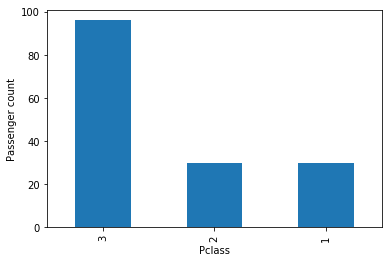

In [21]:
plt = data.Pclass.value_counts().plot('bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Passenger count')

### 2nd class has the high chance of survival

Text(0, 0.5, 'Survival Probability')

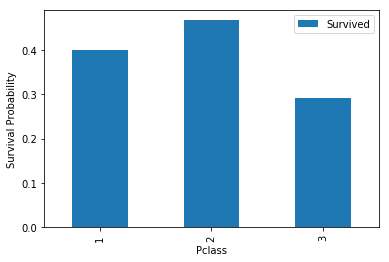

In [22]:
plt = data[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

### SibSp ,it gives the count of sibilings/spouse the  passengers have

### Majority of passengers have no Sibilings/Spouse

Text(0, 0.5, 'Passenger count')

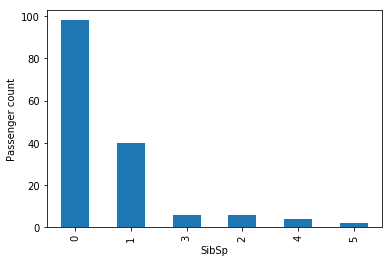

In [23]:
plt = data.SibSp.value_counts().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

### The passengers having one sibling/spouse has more survival probability.

Text(0, 0.5, 'Survival Probability')

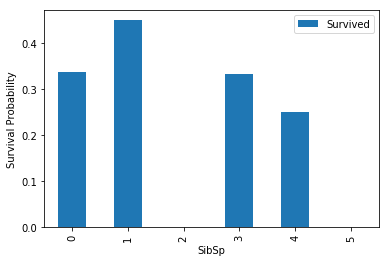

In [24]:
plt = data[['SibSp', 'Survived']].groupby('SibSp').mean().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

### Parch,it gives the details whether the passengers have children/parents

#### Majority of passengers have no children/parents

Text(0, 0.5, 'Passenger count')

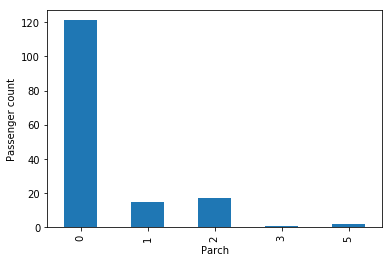

In [25]:
plt = data.Parch.value_counts().sort_index().plot('bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

### The passengers having 5 children/parents has more survival probability

Text(0, 0.5, 'Survival Probability')

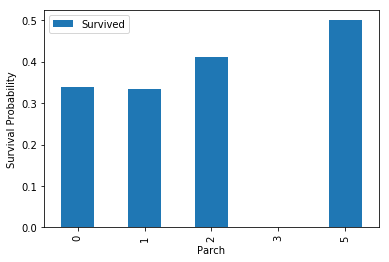

In [26]:
plt = data[['Parch', 'Survived']].groupby('Parch').mean().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

# Spliting of data into Traning and Testing sets

In [27]:
data.columns
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### before splitting data lets apply 'LABEL ENCODER' on the catagorical columns

In [28]:
lb=LabelEncoder()
data['Embarked']=lb.fit_transform(data['Embarked'])
data['Sex']=lb.fit_transform(data['Sex'])

In [29]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [30]:
X1=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked' ]]
y1=data['Survived']

In [31]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state=1)